<a href="https://colab.research.google.com/github/oneryigit/notebooks/blob/main/Kurds_EPR_UCPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kurds and Ethnic Conflict using `geopandas`

- Data: Ethnic Power Relations and UCPD.

- The map shows where Kurdish people are located in the world according to EPR dataset, and where conflict events occur from late 1980s to 2021. 

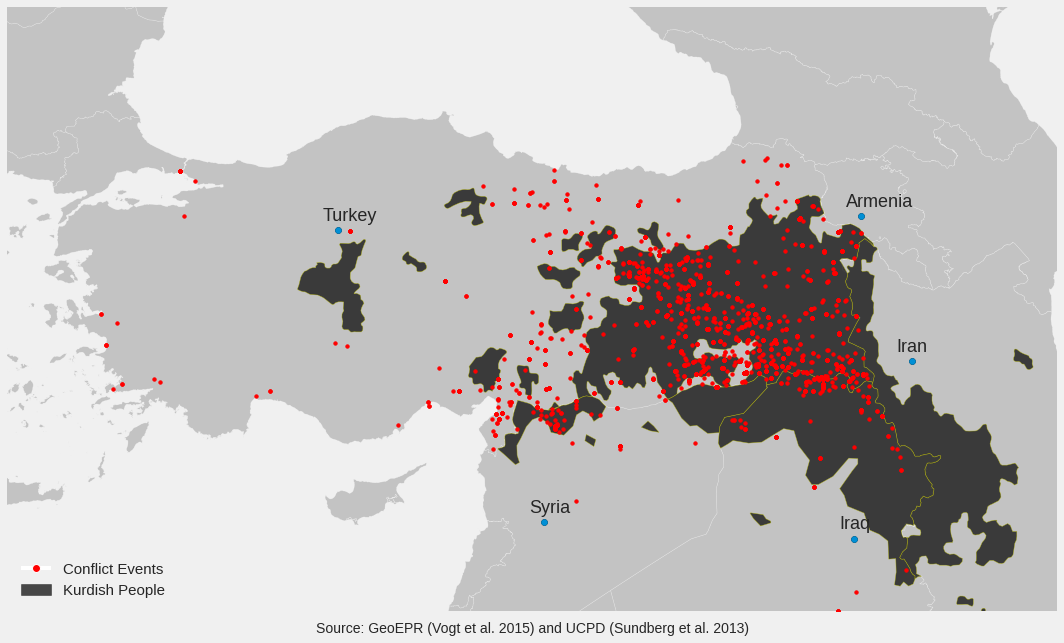

In [39]:
from IPython import display
display.Image("/content/Kurd_EPR_UCPD.png")

In [ ]:
#pip install geopandas

In [3]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

## Reading GEO_EPR Dataset

In [4]:
df= pd.read_csv('GeoEPR-2021.csv')

df.head()

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
0,2,United States of America,1946,1958,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
1,2,United States of America,1946,1958,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...
2,2,United States of America,1946,1958,American Indians,5000,205000,NaN,939761,Regionally based,SRID=4326;MULTIPOLYGON (((-73.91164589888828 4...
3,2,United States of America,1959,1959,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
4,2,United States of America,1959,1959,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...


In [5]:
#Subseting Kurds

kurds=df[df['group']=='Kurds']

kurds

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,SRID=4326;MULTIPOLYGON (((61.0638615 28.668499...
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,SRID=4326;MULTIPOLYGON (((43.33251953 40.55212...
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,SRID=4326;MULTIPOLYGON (((43.91298220996158 37...
1103,652,Syria,1946,1966,Kurds,6000,65206000,NaN,22007,Regionally based,SRID=4326;MULTIPOLYGON (((41.835273208791534 3...
1108,652,Syria,1967,1967,Kurds,6000,65206000,NaN,22007,Regionally based,SRID=4326;MULTIPOLYGON (((41.835273208791534 3...
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,SRID=4326;MULTIPOLYGON (((41.835273208791534 3...


In [6]:
kurds['the_geom']=kurds.the_geom.str.replace(r'SRID=4326;','')

kurds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,"MULTIPOLYGON (((61.0638615 28.66849989, 61.057..."
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,"MULTIPOLYGON (((43.33251953 40.55212402, 43.37..."
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,MULTIPOLYGON (((43.91298220996158 37.226591119...
1103,652,Syria,1946,1966,Kurds,6000,65206000,NaN,22007,Regionally based,MULTIPOLYGON (((41.835273208791534 36.59888211...
1108,652,Syria,1967,1967,Kurds,6000,65206000,NaN,22007,Regionally based,MULTIPOLYGON (((41.835273208791534 36.59888211...
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,MULTIPOLYGON (((41.835273208791534 36.59888211...


In [7]:
#assigning geometry column from EPR
kurds['the_geom']=gpd.GeoSeries.from_wkt(kurds['the_geom'])
#creating geo DataFrame
kurds_geo=gpd.GeoDataFrame(kurds, geometry=kurds['the_geom'], crs='EPSG:4326')

kurds_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom,geometry
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,"MULTIPOLYGON (((61.06386 28.66850, 61.05754 28...","MULTIPOLYGON (((61.06386 28.66850, 61.05754 28..."
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,"MULTIPOLYGON (((43.33252 40.55212, 43.37311 40...","MULTIPOLYGON (((43.33252 40.55212, 43.37311 40..."
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,"MULTIPOLYGON (((43.91298 37.22659, 43.91298 37...","MULTIPOLYGON (((43.91298 37.22659, 43.91298 37..."
1103,652,Syria,1946,1966,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."
1108,652,Syria,1967,1967,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."


In [27]:
#kurds_geo=kurds_geo.drop(index=1108)

kurds_geo=kurds_geo.drop(index=1103)


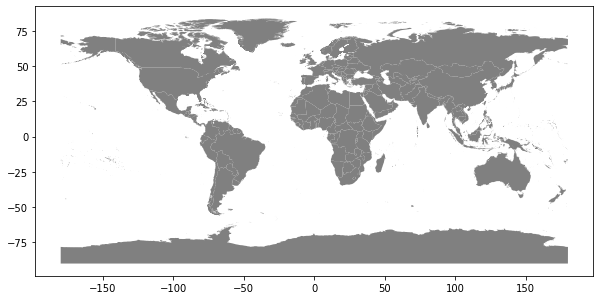

In [10]:
world= gpd.read_file('/content/world_countries_2020.shp')

world.plot(color='gray', figsize=(10,8));

Text(0.5, 1.0, 'The Kurds')

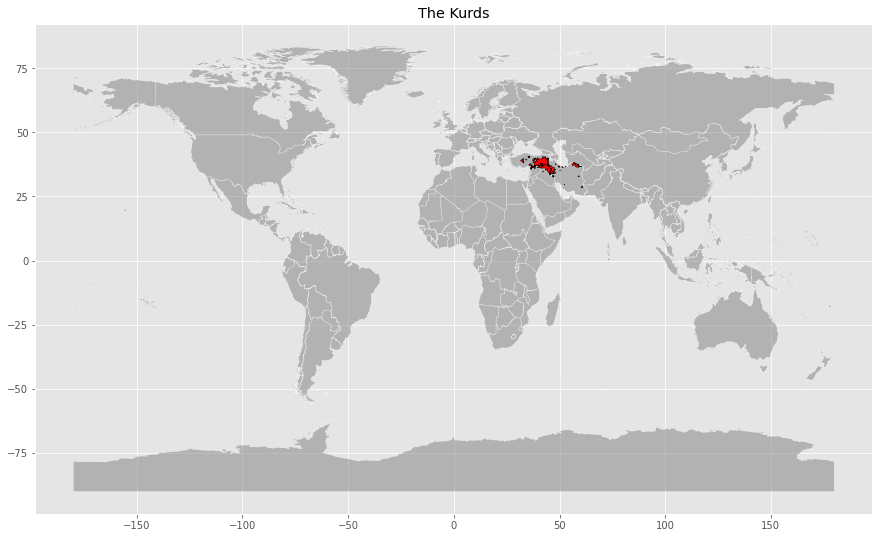

In [11]:
plt.style.use('ggplot')

fig, ax= plt.subplots(figsize=(15,10))

world.plot(ax=ax,color='gray', edgecolor='w',alpha=0.5) #World
kurds_geo.plot(ax=ax, color='r', edgecolor='k') #Turkey

ax.set_title('The Kurds')

In [19]:
#Okay here, to plot names of countries, I enter coordinates of capitals
#Some capitals were far away, in that case, I use another close city point (e.g. iran)
cities={'city':['Turkey', 'Syria', 'Iran', 'Iraq','Armenia'],
    'longitude':[32.5597, 37.2765, 45.6786,44.3661, 44.5152],
    'latitude':[39.9334, 34.6138, 37.54982,34.3152,40.1872]}

cities_df=pd.DataFrame(cities)



#turn cities_df into a geo dataframe from xy coordinates. 
city_geo = gpd.GeoDataFrame(cities_df, 
                            geometry=gpd.points_from_xy(cities_df.longitude,cities_df.latitude),
                            crs="EPSG:4326")


In [30]:
ucpd= pd.read_csv('ged211.csv')
ucpd = ucpd[ucpd['side_a'] == 'Government of Turkey']
#ucpd_2010=ucpd[ucpd.year<2011]
ucpd_2010_pkk = ucpd[ucpd['side_b'].apply(lambda val: all(val != s for s in ['MKP', 'DHKP-C']))]

#Transforming UCPD Dataset as geo-data frame

gs = gpd.GeoSeries.from_wkt(ucpd_2010_pkk['geom_wkt'])
geo_event = gpd.GeoDataFrame(ucpd_2010_pkk, geometry=gs, crs="EPSG:4326")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Ploting final map

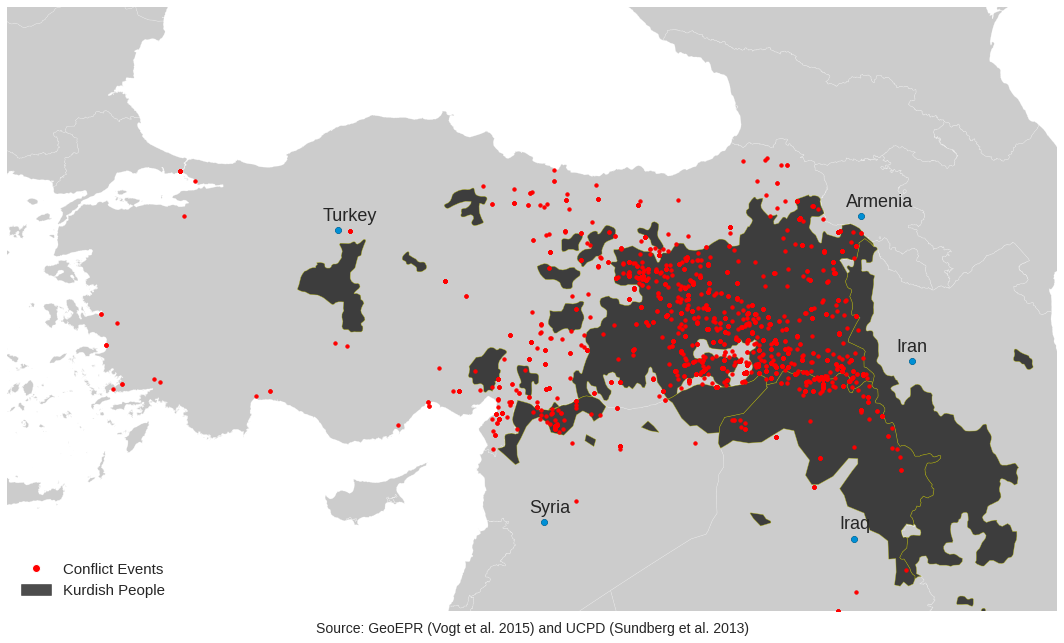

In [38]:
#plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')


fig, ax= plt.subplots(figsize=(15,10))

world.plot(ax=ax,color='gray', edgecolor='w',alpha=0.4) #World
kurds_geo.plot(ax=ax, color='black', edgecolor='y',alpha=0.7) #Kurds
city_geo.plot(ax=ax, color='k')
geo_event.plot(ax=ax, c='r', alpha=1, edgecolor='red',markersize=14)

#ax.set_title('Ethnic Conflict in Turkey')
ax.axis([25,49, 33,44])

ax.set_axis_off()
ax.grid(False)

city_geo.plot(ax=ax)
for x, y, label in zip(city_geo.geometry.x, city_geo.geometry.y, city_geo.city):
    ax.annotate(label,size=18, xy=(x, y), xytext=(-15, 10), textcoords="offset points")

txt="Source: GeoEPR (Vogt et al. 2015) and UCPD (Sundberg et al. 2013)"
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=14);

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Conflict Events',
                          markerfacecolor='r', markersize=8, alpha=1),
                  Patch(facecolor='Black', edgecolor='k',
                         label='Kurdish People', alpha=0.7)]
ax.legend(handles=legend_elements, loc='lower left', fontsize=15,shadow=False, frameon=False)


plt.axis('off')
fig.tight_layout()
fig.set_facecolor("w")
plt.show()
fig.savefig('Kurd_EPR_UCPD.pdf',bbox_inches='tight')
fig.savefig('Kurd_EPR_UCPD.png',bbox_inches='tight')